# Using  age model data from opencoredata.org/sparql


Author: Douglas Fils   
Email: dfils@oceanleadership.org  
RDF dump:  http://data.oceandrilling.org/RDF/janusAmp/janusAmp.ttl   (3.6 Megs)   

CHRONOS age models have been converted to a RDF data cube model to allow them to be used to programmatically search other drilling data graphs based on time.
Eventually this would be combined with CSIRO timescale data to allow searches on stage names too. 

Let's look at what data a give LOC has in this this graph.  Let's assume we know our age model URI is http://chronos.org/janusAmp/loc/agemodel/2449.   We can then extract data associated with it.   Also we can simply look at http://chronos.org/janusAmp/loc/agemodel/2449 and see the plot of the data as well.  

Note that the data with the URI does not have its age depth pairs.  We must extract these as observations associated with the age model data set.

In [1]:
from SPARQLWrapper import SPARQLWrapper, JSON
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

sparql = SPARQLWrapper("http://opencoredata.org/sparql")
sparql.setQuery("""
PREFIX chronos: <http://www.chronos.org/loc-schema#>
PREFIX geo: <http://www.w3.org/2003/01/geo/wgs84_pos#>
SELECT  ?p ?o
FROM <http://chronos.org/janusamp#>
WHERE {
  <http://chronos.org/janusAmp/loc/agemodel/2449> ?p ?o
}
""")
sparql.setReturnFormat(JSON)
results = sparql.query().convert()

agemodel = []
agemodel.append(["Predicate", "Object"])

for result in results["results"]["bindings"]:
    agemodel.append([result["p"]["value"],result["o"]["value"]])
   
print(agemodel)

/Users/dfils/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


[['Predicate', 'Object'], [u'http://www.w3.org/1999/02/22-rdf-syntax-ns#type', u'http://purl.org/linked-data/cube#DataSet'], [u'http://www.w3.org/2000/01/rdf-schema#seeAlso', u'http://data.oceandrilling.org/codices/lsh/207/1260'], [u'http://www.w3.org/2000/01/rdf-schema#seeAlso', u'http://data.oceandrilling.org/codices/lsh/207/1260/B'], [u'http://www.w3.org/2000/01/rdf-schema#seeAlso', u'http://data.oceandrilling.org/codices/lsh/207'], [u'http://purl.org/dc/elements/1.1/title', u'207_1260B'], [u'http://purl.org/dc/elements/1.1/creator', u'fils'], [u'http://www.w3.org/2003/01/geo/wgs84_pos#lat', u'9.2655117'], [u'http://www.w3.org/2003/01/geo/wgs84_pos#long', u'-54.5441967'], [u'http://purl.org/dc/elements/1.1/description', u''], [u'http://purl.org/dc/elements/1.1/date', u'2008-05-14 11:52:04.0'], [u'http://www.chronos.org/loc-schema#leg', u'207'], [u'http://www.chronos.org/loc-schema#site', u'1260'], [u'http://www.chronos.org/loc-schema#hole', u'B'], [u'http://www.chronos.org/loc-schem

Now let's extract all the age depth pairs.  The follow query is just one way (not the best) to get the age depth pairs for an age model at a site.  Note now we are looking for an age model based on a particular leg site hole.


In [2]:
from SPARQLWrapper import SPARQLWrapper, JSON
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
sparql = SPARQLWrapper("http://opencoredata.org/sparql")
sparql.setQuery("""
PREFIX chronos: <http://www.chronos.org/loc-schema#>
PREFIX geo: <http://www.w3.org/2003/01/geo/wgs84_pos#>
SELECT  ?dataset ?ob ?age ?depth  
FROM <http://chronos.org/janusamp#>
WHERE {
  ?ob chronos:age ?age . 
  ?ob chronos:depth ?depth . 
  ?ob <http://purl.org/linked-data/cube#dataSet>  ?dataset .
  ?dataset geo:long ?long .
  ?dataset geo:lat ?lat .
  ?dataset <http://www.w3.org/2000/01/rdf-schema#seeAlso> <http://data.oceandrilling.org/codices/lsh/207/1260/B>.
}
ORDER BY ?dataset ASC(?depth)
""")
sparql.setReturnFormat(JSON)
results = sparql.query().convert()

agemodel = []
agemodel.append(["DataSet", "ObservationID", "Age",  "Depth"])

for result in results["results"]["bindings"]:
    agemodel.append([result["dataset"]["value"],result["ob"]["value"],float(result["age"]["value"]),
                     float(result["depth"]["value"])])
   
print(agemodel)

[['DataSet', 'ObservationID', 'Age', 'Depth'], [u'http://chronos.org/janusAmp/loc/agemodel/2449', u'http://www.chronos.org/loc-schema#obs875_0', 0.0, 0.0], [u'http://chronos.org/janusAmp/loc/agemodel/2449', u'http://www.chronos.org/loc-schema#obs875_1', 38.57143, 46.17084], [u'http://chronos.org/janusAmp/loc/agemodel/2449', u'http://www.chronos.org/loc-schema#obs875_2', 53.19876, 242.1944], [u'http://chronos.org/janusAmp/loc/agemodel/2449', u'http://www.chronos.org/loc-schema#obs875_3', 57.76398, 320.76583], [u'http://chronos.org/janusAmp/loc/agemodel/2449', u'http://www.chronos.org/loc-schema#obs875_4', 92.23602, 416.34757], [u'http://chronos.org/janusAmp/loc/agemodel/2449', u'http://www.chronos.org/loc-schema#obs875_5', 114.59627, 510.30928]]


We could also plot the LOC 

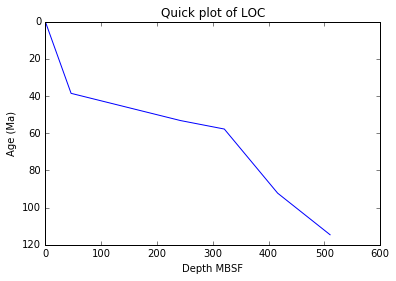

In [3]:
from SPARQLWrapper import SPARQLWrapper, JSON
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

 
sparql = SPARQLWrapper("http://opencoredata.org/sparql")
sparql.setQuery("""
PREFIX chronos: <http://www.chronos.org/loc-schema#>
PREFIX geo: <http://www.w3.org/2003/01/geo/wgs84_pos#>
SELECT  ?age ?depth  
FROM <http://chronos.org/janusamp#>
WHERE {
  ?ob chronos:age ?age . 
  ?ob chronos:depth ?depth . 
  ?ob <http://purl.org/linked-data/cube#dataSet>  ?dataset .
  ?dataset geo:long ?long .
  ?dataset geo:lat ?lat .
  ?dataset <http://www.w3.org/2000/01/rdf-schema#seeAlso> <http://data.oceandrilling.org/codices/lsh/207/1260/B>.
}
ORDER BY ?dataset ASC(?depth)
""")
sparql.setReturnFormat(JSON)
results = sparql.query().convert()

agemodel = []
depth = []
age = []

for result in results["results"]["bindings"]:
    depth.append(float(result["depth"]["value"]))
    age.append(float(result["age"]["value"]))

# plot results
plt.plot(depth,age)
plt.xlabel('Depth MBSF')
plt.ylabel('Age (Ma)')
plt.title('Quick plot of LOC')
plt.gca().invert_yaxis()
plt.show()

Let's plot the locations of all the LOCs we have

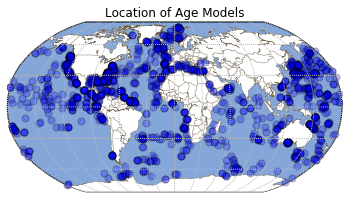

In [4]:
from SPARQLWrapper import SPARQLWrapper, JSON
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

 
sparql = SPARQLWrapper("http://opencoredata.org/sparql")
sparql.setQuery("""
PREFIX chronos: <http://www.chronos.org/loc-schema#>
PREFIX geo: <http://www.w3.org/2003/01/geo/wgs84_pos#>
SELECT DISTINCT  ?lat ?long
FROM <http://chronos.org/janusamp#>
WHERE {
  ?ob <http://purl.org/linked-data/cube#dataSet>  ?dataset .
  ?dataset geo:long ?long .
  ?dataset geo:lat ?lat .
}
""")
sparql.setReturnFormat(JSON)
results = sparql.query().convert()

lats = []
lngs = []

for result in results["results"]["bindings"]:
#    print(result["uri"]["value"] + " " + result["long"]["value"] + " " + result["lat"]["value"]  )
    lats.append(float(result["lat"]["value"]))    
    lngs.append(float(result["long"]["value"]))
    

m = Basemap(projection='robin',lon_0=0,resolution='c')
m.drawmapboundary(fill_color='#85A6D9')
m.fillcontinents(color='white',lake_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawcountries(color='#6D5F47', linewidth=.4)
m.drawmeridians(np.arange(-180, 180, 30), color='#bbbbbb')
m.drawparallels(np.arange(-90, 90, 30), color='#bbbbbb')

# compute the native map projection coordinates for the vents
x,y = m(lngs,lats)

# plot our vents
m.scatter(x, y, s=50, c='blue', marker='o', alpha=0.25, zorder = 2,)

#add a title and display the map on screen
plt.title('Location of Age Models')
plt.show() 

## We can also do searches based on stages now with this.  For example, lets look for log files based on time.

##### NOTE:  this search is really pointless from a science point of view.  We likely don't care about the age of the bottom of a logging.       However .....  it demonstrates an available pipeline for searching that could be bolted to a nice WEB UI for a user community.   

In [5]:
from SPARQLWrapper import SPARQLWrapper, JSON
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
sparql = SPARQLWrapper("http://opencoredata.org/sparql")
sparql.setQuery("""
SELECT ?ls ?logbottom
FROM NAMED <http://chronos.org/timescales/>
FROM NAMED <http://data.oceandrilling.org/codices/logatage#>
WHERE {
	  GRAPH <http://chronos.org/timescales/> {
          ?s <http://chronos.org/ageName> "Paleocene" .
          ?s <http://chronos.org/agePrefix> "Upper" . 
          ?s <http://chronos.org/ageMinMa> ?minma .
          ?s <http://chronos.org/ageMaxMa> ?maxma .
      }
      GRAPH <http://data.oceandrilling.org/codices/logatage#> {
          ?ls  <http://data.oceandrilling.org/core/1/ma> ?logbottom .
      }
      FILTER (?logbottom > ?minma ) .
      FILTER (?logbottom < ?maxma ) .
}
LIMIT 10
""")
sparql.setReturnFormat(JSON)
results = sparql.query().convert()

logResults = []
logResults.append(["Log File URI (not web resolvable yet)", "Log Bottom"])

for result in results["results"]["bindings"]:
    logResults.append([result["ls"]["value"],result["logbottom"]["value"]])
   
# If we wanted a table of results we can do this (or save the results to a file/csv)
print(logResults)


[['Log File URI (not web resolvable yet)', 'Log Bottom'], [u'http://data.oceandrilling.org/codices/logatage/laa2132', u'55.078175'], [u'http://data.oceandrilling.org/codices/logatage/laa3329', u'55.078835'], [u'http://data.oceandrilling.org/codices/logatage/laa912', u'55.078835'], [u'http://data.oceandrilling.org/codices/logatage/laa902', u'55.09585'], [u'http://data.oceandrilling.org/codices/logatage/laa909', u'55.096508'], [u'http://data.oceandrilling.org/codices/logatage/laa3331', u'55.096508'], [u'http://data.oceandrilling.org/codices/logatage/laa905', u'55.153442'], [u'http://data.oceandrilling.org/codices/logatage/laa3328', u'55.153442'], [u'http://data.oceandrilling.org/codices/logatage/laa3330', u'55.153442'], [u'http://data.oceandrilling.org/codices/logatage/laa2133', u'55.153442']]


Let's look at chem carbon

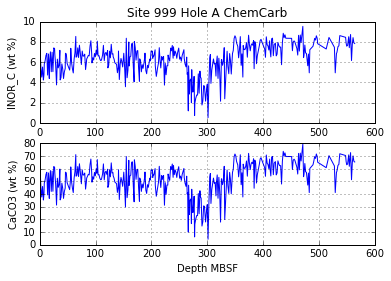

In [6]:
from SPARQLWrapper import SPARQLWrapper, JSON
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
sparql = SPARQLWrapper("http://opencoredata.org/sparql")
sparql.setQuery("""
PREFIX qb:  <http://purl.org/linked-data/cube#> 
PREFIX iodp: <http://data.oceandrilling.org/core/1/>
PREFIX janus: <http://data.oceandrilling.org/janus/>
PREFIX sdmx-dimension:  <http://purl.org/linked-data/sdmx/2009/dimension#> 
SELECT ?mbsf ?resulta ?resultb
FROM <http://data.oceandrilling.org/janus/>
WHERE {
 ?s janus:site 999  .
 ?s janus:hole "A"   .                                  
  ?s janus:mbsf                               ?mbsf  .                                                           
  ?s janus:core                               ?core   .                                                           
 ?s janus:coretype                           ?coretype  .                                                     
 ?s janus:sectionnumber                      ?sectionnumber .                                                  
 ?s janus:sectiontype                        ?sectiontype   .                                                   
 ?s janus:avgdecodeccaanalysiscodeinorcccaanalysisresult  ?resulta   .
 ?s janus:avgdecodeccaanalysiscodecaco3ccaanalysisresult  ?resultb   .
}
ORDER BY ASC(?mbsf)
""")
sparql.setReturnFormat(JSON)
results = sparql.query().convert()

countsByDepth = []
depth = []
resulta = []
resultb = []
countsByDepth.append(["mbsf", "resulta", "resultb"])

for result in results["results"]["bindings"]:
    countsByDepth.append([float(result["mbsf"]["value"]),float(result["resulta"]["value"]),
                          float(result["resultb"]["value"])])
    depth.append(float(result["mbsf"]["value"]))
    resulta.append(float(result["resulta"]["value"]))
    resultb.append(float(result["resultb"]["value"]))
# If we wanted a table of results we can do this (or save the results to a file/csv)
#make_table(countsByDepth)
#apply_theme('basic')

# plot results
plt.subplot(211)
plt.plot(depth,resulta)
plt.ylabel('INOR_C (wt %)')
plt.title('Site 999 Hole A ChemCarb')
plt.grid(True)

plt.subplot(212)
plt.plot(depth,resultb)
plt.xlabel('Depth MBSF')
plt.ylabel('CaCO3 (wt %)')
plt.grid(True)
plt.show()



## Let's search on the OLD (deprecated now) Janus data set.  Plot the results against the given MBSF values.

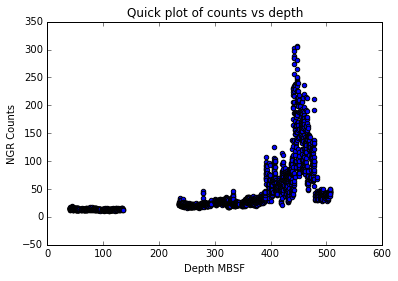

In [7]:
from SPARQLWrapper import SPARQLWrapper, JSON
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
sparql = SPARQLWrapper("http://opencoredata.org/sparql")
sparql.setQuery("""
PREFIX qb:  <http://purl.org/linked-data/cube#> 
PREFIX iodp: <http://data.oceandrilling.org/core/1/>
PREFIX janus: <http://data.oceandrilling.org/janus/>
PREFIX sdmx-dimension:  <http://purl.org/linked-data/sdmx/2009/dimension#> 
SELECT ?mbsf ?totalcountssec ?nxdtotalcount
FROM <http://data.oceandrilling.org/janus/>
WHERE {
 ?s janus:site 1260  .
 ?s janus:hole "B"   .                                  
 ?s janus:nxdmsttopinterval1000              ?nxdmsttopinterval1000  .                                        
 ?s janus:totalcountssec                     ?totalcountssec    .                                             
  ?s janus:mbsf                               ?mbsf  .                                                           
  ?s janus:core                               ?core   .                                                           
 ?s janus:coretype                           ?coretype  .                                                     
 ?s janus:sectionnumber                      ?sectionnumber .                                                  
 ?s janus:sectiontype                        ?sectiontype   .                                                   
 ?s janus:nxdtotalcountssecnbtotalcountssec  ?nxdtotalcount   .
}
ORDER BY ASC(?mbsf)
""")
sparql.setReturnFormat(JSON)
results = sparql.query().convert()

countsByDepth = []
depth = []
counts = []
countsByDepth.append(["mbsf", "totalcountssec", "nxdtotalcount"])

for result in results["results"]["bindings"]:
    countsByDepth.append([float(result["mbsf"]["value"]),float(result["totalcountssec"]["value"]),
                          float(result["nxdtotalcount"]["value"])])
    depth.append(float(result["mbsf"]["value"]))
    counts.append(float(result["totalcountssec"]["value"]))
# If we wanted a table of results we can do this (or save the results to a file/csv)
#make_table(countsByDepth)
#apply_theme('basic')

# plot results
plt.scatter(depth,counts)
plt.xlabel('Depth MBSF')
plt.ylabel('NGR Counts')
plt.title('Quick plot of counts vs depth')
plt.show()



## Let's grab both the age model data and some Janus data and convert depth to age via the model.  

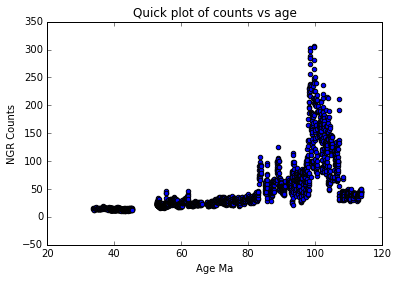

In [8]:
from SPARQLWrapper import SPARQLWrapper, JSON
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

sparql = SPARQLWrapper("http://opencoredata.org/sparql")
sparql.setQuery("""
PREFIX chronos: <http://www.chronos.org/loc-schema#>
PREFIX geo: <http://www.w3.org/2003/01/geo/wgs84_pos#>
SELECT  ?dataset ?ob ?age ?depth ?lat ?long
FROM <http://chronos.org/janusamp#>
WHERE {
  ?ob chronos:age ?age . 
  ?ob chronos:depth ?depth . 
  ?ob <http://purl.org/linked-data/cube#dataSet>	?dataset .
  ?dataset geo:long ?long .
  ?dataset geo:lat ?lat .
  ?dataset <http://www.w3.org/2000/01/rdf-schema#seeAlso> <http://data.oceandrilling.org/codices/lsh/207/1260/B>.
}
ORDER BY ?dataset ASC(?depth)
""")
sparql.setReturnFormat(JSON)
results = sparql.query().convert()

sparql2 = SPARQLWrapper("http://data.oceandrilling.org/sparql")
sparql2.setQuery("""
PREFIX qb:  <http://purl.org/linked-data/cube#> 
PREFIX iodp: <http://data.oceandrilling.org/core/1/>
PREFIX janus: <http://data.oceandrilling.org/janus/>
PREFIX sdmx-dimension:  <http://purl.org/linked-data/sdmx/2009/dimension#> 
SELECT ?mbsf ?totalcountssec ?nxdtotalcount
FROM <http://data.oceandrilling.org/janus/>
WHERE {
 ?s janus:site 1260  .
 ?s janus:hole "B"   .                                  
 ?s janus:nxdmsttopinterval1000              ?nxdmsttopinterval1000  .                                        
 ?s janus:totalcountssec                     ?totalcountssec    .                                             
  ?s janus:mbsf                               ?mbsf  .                                                           
  ?s janus:core                               ?core   .                                                           
 ?s janus:coretype                           ?coretype  .                                                     
 ?s janus:sectionnumber                      ?sectionnumber .                                                  
 ?s janus:sectiontype                        ?sectiontype   .                                                   
 ?s janus:nxdtotalcountssecnbtotalcountssec  ?nxdtotalcount   .
}
ORDER BY ASC(?mbsf)
""")
sparql2.setReturnFormat(JSON)
ngrdata = sparql2.query().convert()

ages = []
depths = []

for result in results["results"]["bindings"]:
    ages.append(float(result["age"]["value"]))
    depths.append(float(result["depth"]["value"]))
                    
# quick and dirty conversion to age just to get something done...  
# later we would vett this a bit more
calculatedage = []        
# given a point what two depths does it fall between
for item in ngrdata["results"]["bindings"]:
    depth = float(item["mbsf"]["value"])
    upperindex =  next(x[0] for x in enumerate(depths) if x[1] > depth)
    m =  (depths[upperindex] - depths[upperindex-1]) /  (ages[upperindex] - ages[upperindex - 1])
    b =  depths[upperindex] - (m * (ages[upperindex]))
    x =  (depth - b) / m
    calculatedage.append(x)

countsByDepth = []
for item in ngrdata["results"]["bindings"]:
    #countsByDepth.append([float(item["mbsf"]["value"]),float(item["totalcountssec"]["value"]),
    #float(item["nxdtotalcount"]["value"])])
    countsByDepth.append([float(item["totalcountssec"]["value"])])

plt.scatter(calculatedage,countsByDepth)
plt.xlabel('Age Ma')
plt.ylabel('NGR Counts')
plt.title('Quick plot of counts vs age')
plt.show()


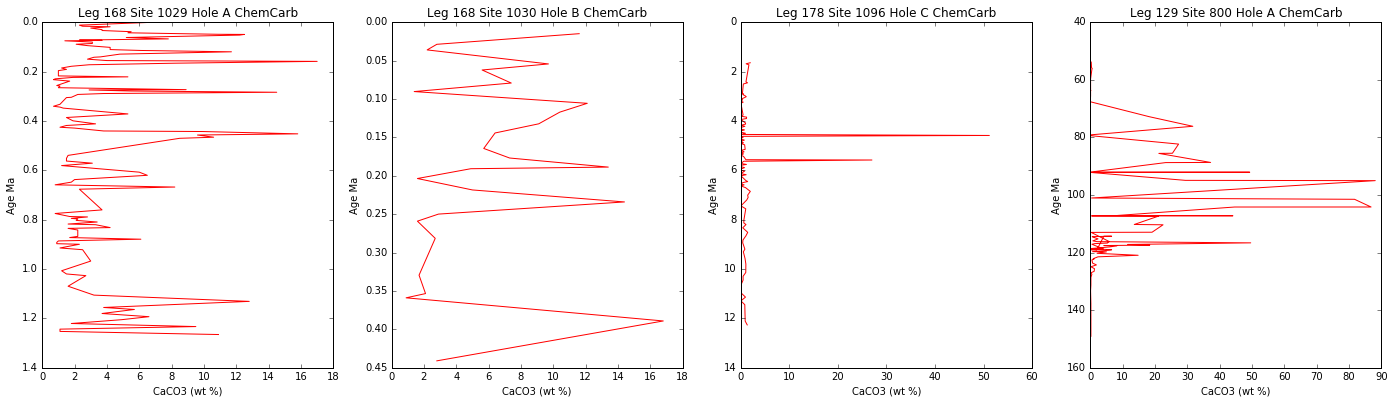

In [10]:
from SPARQLWrapper import SPARQLWrapper, JSON
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
from pylab import *

# read in a file and parse out the leg site hole

rows = []
with open("support_files/lsh.dat") as f:
     for line in f:
        r = line.split()
        rows.append({'leg':r[0], 'site':r[1], 'hole':r[2]})
        
#f, axarr = plt.subplots(1,4)
i = 0
j = 0
fig, axes = plt.subplots(figsize=(24,6))
 
    
for row in rows:
    sparql = SPARQLWrapper("http://data.oceandrilling.org/sparql")
    sparql.setQuery("""
    PREFIX chronos: <http://www.chronos.org/loc-schema#>
    PREFIX geo: <http://www.w3.org/2003/01/geo/wgs84_pos#>
    SELECT  ?dataset ?ob ?age ?depth ?lat ?long
    FROM <http://chronos.org/janusamp#>
    WHERE {{
      ?ob chronos:age ?age . 
      ?ob chronos:depth ?depth . 
      ?ob <http://purl.org/linked-data/cube#dataSet>	?dataset .
      ?dataset geo:long ?long .
      ?dataset geo:lat ?lat .
      ?dataset chronos:leg "{leg}" .
      ?dataset chronos:site "{site}" .
      ?dataset chronos:hole "{hole}" .
    }}
    ORDER BY ?dataset ASC(?depth)
    """.format(leg=row['leg'], site=row['site'], hole=row['hole']))
    sparql.setReturnFormat(JSON)
    results = sparql.query().convert()
      
    sparql2 = SPARQLWrapper("http://data.oceandrilling.org/sparql")
    sparql2.setQuery("""
    PREFIX qb:  <http://purl.org/linked-data/cube#> 
    PREFIX iodp: <http://data.oceandrilling.org/core/1/>
    PREFIX janus: <http://data.oceandrilling.org/janus/>
    PREFIX sdmx-dimension:  <http://purl.org/linked-data/sdmx/2009/dimension#> 
    SELECT ?mbsf ?resulta ?resultb
    FROM <http://data.oceandrilling.org/janus/>
    WHERE {{
     ?s janus:leg {leg} .
     ?s janus:site {site}  .
     ?s janus:hole "{hole}"   .                                  
      ?s janus:mbsf                               ?mbsf  .                                                           
      ?s janus:core                               ?core   .                                                           
     ?s janus:coretype                           ?coretype  .                                                     
     ?s janus:sectionnumber                      ?sectionnumber .                                                  
     ?s janus:sectiontype                        ?sectiontype   .                                                   
     ?s janus:avgdecodeccaanalysiscodeinorcccaanalysisresult  ?resulta   .
     ?s janus:avgdecodeccaanalysiscodecaco3ccaanalysisresult  ?resultb   .
    }}
    ORDER BY ASC(?mbsf)
    """.format(leg=row['leg'], site=row['site'], hole=row['hole']))
    sparql2.setReturnFormat(JSON)
    ngrdata = sparql2.query().convert()
    
    ages = []
    depths = []
    for result in results["results"]["bindings"]:
        ages.append(float(result["age"]["value"]))
        depths.append(float(result["depth"]["value"]))         

    calculatedage = []     
    for item in ngrdata["results"]["bindings"]:
        depth = float(item["mbsf"]["value"])
        if (depth < max(depths)):
          upperindex =  next(x[0] for x in enumerate(depths) if x[1] > depth)
          m =  (depths[upperindex] - depths[upperindex-1]) /  (ages[upperindex] - ages[upperindex - 1])
          b =  depths[upperindex] - (m * (ages[upperindex]))
          x =  (depth - b) / m
          calculatedage.append(x)
    
    countsByDepth = []
    for item in ngrdata["results"]["bindings"]:
        depth = float(item["mbsf"]["value"])
        if (depth < max(depths)):
          #countsByDepth.append([float(item["mbsf"]["value"]),float(item["totalcountssec"]
        # ["value"]),float(item["nxdtotalcount"]["value"])])
          countsByDepth.append([float(item["resultb"]["value"])])
    
    j = j + 1

    plt.subplot(1, 4, j)
    #axarr[i, j].plot(countsByDepth,calculatedage, 'r')
    plt.plot(countsByDepth,calculatedage, 'r')
    plt.ylabel('Age Ma')
    plt.xlabel('CaCO3 (wt %)')
    #pylab.ylim(ymin=0)
    #pylab.xlim([0,100])
    plt.gca().invert_yaxis()
    plt.title('Leg {leg} Site {site} Hole {hole} ChemCarb'.format(leg=row['leg'], site=row['site'], hole=row['hole']))

    
plt.tight_layout()
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)
plt.show()
